In [1]:
# import all necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.preprocessing import StandardScaler  
from sklearn import metrics

## Predict Market Value using Linear Regression

In [2]:
# download GlenCove excel data
df = pd.read_excel("GlenCove.xlsx")

In [3]:
# display first ten rows of data
df.head(n=10)

,Address,Fair Market Value($000),Property Size (acres),Age,House Size (square feet),Rooms,Baths,Garage
0,9 Sycamore Road,522.9,0.2297,56,2448,7,3.5,2
1,21 Jefferson St,425.0,0.2192,61,1942,7,2.5,1
2,38 Hitching Post Lane,539.2,0.1630,39,2073,5,3.0,2
3,4 Poppy Lane,628.2,0.4608,28,2707,8,2.5,1
4,5 Daniel Drive,490.4,0.2549,56,2042,7,1.5,1
5,15 Francis Terrace,487.7,0.2290,98,2089,7,2.0,0
6,23 Guilfoy Street,370.3,0.1808,58,1433,7,2.0,0
7,17 Carlyle Drive,777.9,0.5015,17,2991,9,2.5,1
8,8 Craft Avenue,347.1,0.2229,62,1008,5,1.0,0
9,22 Beechwood Ct.,756.8,0.1300,25,3202,8,2.5,2


In [4]:
# renames market value, property size, and house size columns
df.columns = ['Address', 'market_value', 'property_size', 'Age', 'house_size', 'Rooms', 'Baths','Garage']

In [5]:
# creates new dataframe without age column
newdf = df.drop(columns = 'Age')

# sets Garage to binary of 0 for no garage, and 1 for garage
# Garage data contains only values 0, 1, and 2 - only need to replace 2 with 1
newdf["Garage"] = newdf.Garage.replace({2:1})

In [6]:
# print summary stats for remaining columns
print(newdf.describe())

       market_value  property_size   house_size      Rooms      Baths  \
count     30.000000      30.000000    30.000000  30.000000  30.000000   
mean     474.910000       0.275960  1978.833333   6.833333   2.000000   
std      144.312669       0.236445   550.875234   1.487496   0.694808   
min      310.200000       0.085200  1008.000000   5.000000   1.000000   
25%      374.675000       0.152650  1622.250000   6.000000   1.625000   
50%      431.200000       0.204050  1992.000000   7.000000   2.000000   
75%      535.125000       0.270350  2205.500000   7.750000   2.500000   
max      889.000000       1.310000  3202.000000  11.000000   3.500000   

          Garage  
count  30.000000  
mean    0.566667  
std     0.504007  
min     0.000000  
25%     0.000000  
50%     1.000000  
75%     1.000000  
max     1.000000  


In [7]:
# print correlation for prop size, house size, rooms and baths
print(newdf[['property_size','house_size','Rooms','Baths']].corr())

               property_size  house_size     Rooms     Baths
property_size       1.000000    0.211664  0.052963  0.053408
house_size          0.211664    1.000000  0.399573  0.521314
Rooms               0.052963    0.399573  1.000000  0.133457
Baths               0.053408    0.521314  0.133457  1.000000


All of the correlations are positive in nature, with varying levels of correlation

1. property_size and house_size = 0.211664
2. property_size and Rooms = 0.052963
3. property_size and Baths = 0.053408
4. house_size and Rooms = 0.399573
5. house_size and Baths = 0.521314
6. Rooms and Baths = 0.133457

In [8]:
# create linear regression, then create and print summary
results = sm.formula.ols('market_value ~ property_size + house_size + Rooms + Baths + Garage', newdf).fit()
results_sum = results.summary()
print(results_sum)

                            OLS Regression Results                            
Dep. Variable:           market_value   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     21.09
Date:                Sun, 11 Oct 2020   Prob (F-statistic):           4.52e-08
Time:                        15:58:04   Log-Likelihood:                -165.94
No. Observations:                  30   AIC:                             343.9
Df Residuals:                      24   BIC:                             352.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        78.0523     67.779      1.152

In [9]:
# creates and prints anova table
aov_table = sm.stats.anova_lm(results, typ = 2)
print(aov_table)

                      sum_sq    df          F    PR(>F)
property_size  185956.980096   1.0  39.850226  0.000002
house_size      45335.829171   1.0   9.715382  0.004693
Rooms              27.229339   1.0   0.005835  0.939743
Baths           13203.326340   1.0   2.829448  0.105518
Garage           3736.437085   1.0   0.800711  0.379768
Residual       111993.529961  24.0        NaN       NaN


This model actually performs very well. The R-squared value is relatively high in the range at 0.815, and the probability is 4.52e-08. The probability alone is well below the 0.05 threshold to reject a null hypothesis. Most of the value in this model is coming from property_size and house_size, not much clarity would be lost if Rooms, Baths and Garage were excluded from the regression.

The regression equation would be:

market_value = 78.0523 + 359.3104 * property_size + 0.1025 * house_size + 0.7385 * Rooms + 36.8445 * Baths + 28.3802 * Garage

The fair market value ($000) of a house that is 2000 sqft, on 0.30 acres, with 6 rooms, 2 bathrooms, and has a garage would be 497.34562

## Distribution of Values of NBA Franchises

In [10]:
# read in dataset NBAValues
df = pd.read_excel("NBAValues.xlsx")

In [11]:
# display data without print
df

,Team Name,Team Code,Revenue ($mil),Current Value ($mil)
0,Atlanta Hawks,ATL,133,825
1,Boston Celtics,BOS,173,1700
2,Brooklyn Nets,BKN,212,1500
3,Charlotte Bobcats,CHA,130,725
4,Chicago Bulls,CHI,201,2000
5,Cleveland Cavaliers,CLE,149,915
6,Dallas Mavericks,DAL,168,1150
7,Denver Nuggets,DEN,136,855
8,Detroit Pistons,DET,144,810
9,Golden State Warriors,GSW,168,1300


In [12]:
# rename columns to friendlier format
df.columns = ['team_name', 'team_code', 'revenue', 'current_value']

Text(0.5, 1.0, 'NBA Team Values')

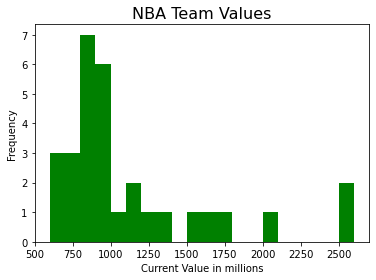

In [13]:
# histogram with 20 bins
fig, ax = plt.subplots()
plt.hist(df['current_value'], bins=20, color = "g")
ax.set_xlabel('Current Value in millions', size = 10)
ax.set_ylabel('Frequency', size = 10)
plt.title('NBA Team Values', size = 16)

Text(0.5, 1.0, 'NBA Team Values')

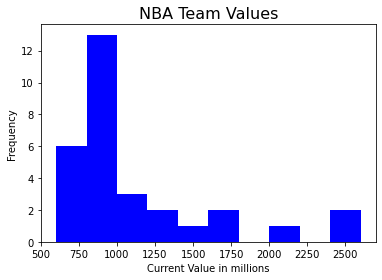

In [14]:
# histogram with 10 bins
fig, ax = plt.subplots()
plt.hist(df['current_value'], bins=10, color = "b")
ax.set_xlabel('Current Value in millions', size = 10)
ax.set_ylabel('Frequency', size = 10)
plt.title('NBA Team Values', size = 16)

Text(0.5, 1.0, 'NBA Team Values')

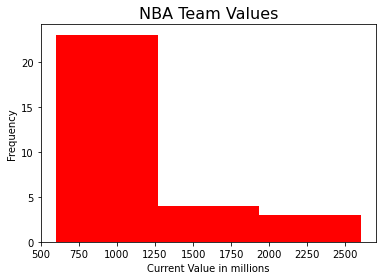

In [15]:
# histogram with 3 bins
fig, ax = plt.subplots()
plt.hist(df['current_value'], bins=3, color = "r")
ax.set_xlabel('Current Value in millions', size = 10)
ax.set_ylabel('Frequency', size = 10)
plt.title('NBA Team Values', size = 16)

For this dataset, it appears that around 10 bins is the right number. It provides enough clarity on where the team values fall without going too far into detail that the graph becomes confusing.

The data for NBA team current value is right-skewed.

## Distribution of Values of MLB teams


In [16]:
df = pd.read_csv("baseball_values.csv")

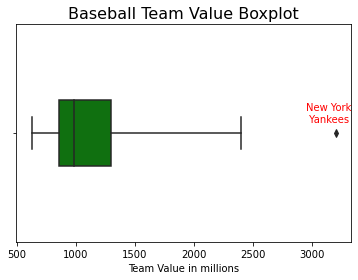

In [17]:
ax = sns.boxplot(x="Value",data = df, color = "g", width = .3, whis = 3)
ax.set_xlabel('Team Value in millions', size = 10)
ax.set_title('Baseball Team Value Boxplot', size = 16)
ax.text(2950, -.05, "New York"+ "\n" + " Yankees", color='red', fontsize=10)
plt.show()

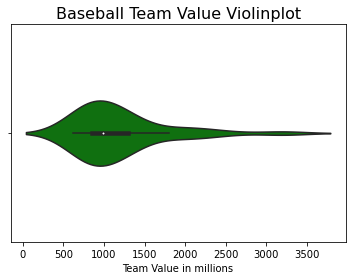

In [18]:
ax = sns.violinplot(x="Value",data = df, color = "g", width = .3, whis = 3)
ax.set_xlabel('Team Value in millions', size = 10)
ax.set_title('Baseball Team Value Violinplot', size = 16)
plt.show()

From the violin plot, the approximate mode appears to be 900.

## Use k-NN to classify the type of fruit

In [19]:
# read in tsv data
df = pd.read_table("fruit.tsv")

In [20]:
#display first 5 rows
df.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [21]:
# counts of each fruit name
df['fruit_name'].value_counts()

orange      19
apple       19
lemon       16
mandarin     5
Name: fruit_name, dtype: int64

In [22]:
# new dataframe containing limited columns
newdf = df[['fruit_name','mass','width','height','color_score']]

Text(0, 0.5, 'Height (CM)')

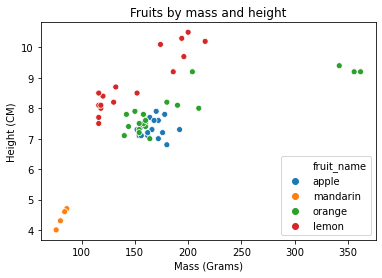

In [23]:
# creates scatterplot for fruits
ax = sns.scatterplot('mass','height','fruit_name', data = newdf)
ax.set_title('Fruits by mass and height')
ax.set_xlabel('Mass (Grams)')
ax.set_ylabel('Height (CM)')


Based on the scatterplot, I think that mass and height could be used as predictor variables. My only concern would be with oranges - I believe that they will be the contributor for almost all errors due to the wide range of mass.

In [24]:
# segments data for modeling
x = newdf[['mass','width','height','color_score']]
y = newdf[['fruit_name']]

In [25]:
# splits data into testing and training set
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.70, test_size=0.30, random_state=0)

In [26]:
# prints summary of x variables
print(x.describe())

             mass      width     height  color_score
count   59.000000  59.000000  59.000000    59.000000
mean   163.118644   7.105085   7.693220     0.762881
std     55.018832   0.816938   1.361017     0.076857
min     76.000000   5.800000   4.000000     0.550000
25%    140.000000   6.600000   7.200000     0.720000
50%    158.000000   7.200000   7.600000     0.750000
75%    177.000000   7.500000   8.200000     0.810000
max    362.000000   9.600000  10.500000     0.930000


In [27]:
# prints summary of y variables
print(y.describe())

       fruit_name
count          59
unique          4
top        orange
freq           19


In [28]:
# standardizes data
scaler = StandardScaler()  
scaler.fit(x_train)
x_train = scaler.transform(x_train)  
x_test = scaler.transform(x_test)  

In [29]:
# initializes and runs the classifier
classifier = KNeighborsClassifier(n_neighbors=5)  
classifier.fit(x_train, np.ravel(y_train))
y_pred = classifier.predict(x_test) 


In [30]:
# creates and prints confusion matrix
conf = metrics.confusion_matrix(y_test, y_pred)
print(conf)

[[4 0 0 0]
 [0 3 0 0]
 [0 0 2 0]
 [1 1 0 7]]


In [31]:
# prints accuracy score
print('Accuracy score for model is:', metrics.accuracy_score(y_test, y_pred))

Accuracy score for model is: 0.8888888888888888
